# Project Title: German Credit Risk (Using Dicision Tree)

# Import Necessary Libraries

In [1]:
#IMPORT LIBRARIES

# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

# What is credit risk?

Credit risk is the probable risk of loss resulting from a borrower's failure to repay a loan or meet contractual obligations.When a bank receives a loan application, they have to make a decision regarding whether to proceed with the loan approval or not based on the applicant's profile and credit.

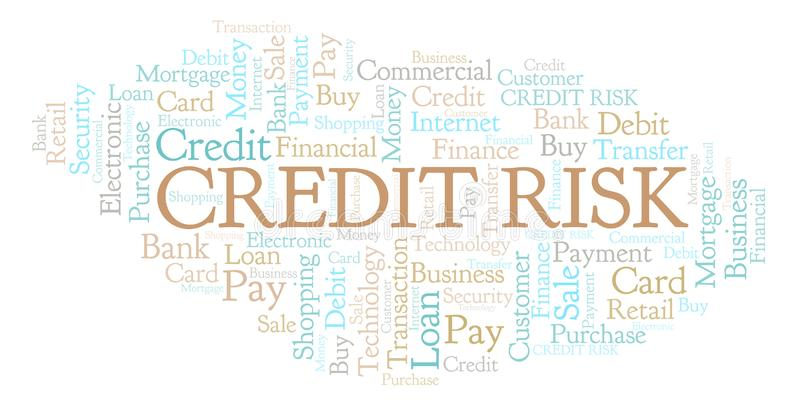

**There are 2 types of credit**

**good credit:** An investment that one believes is likely to be profitable. The term most often refers to a loan made to a creditworthy person or company. Good risks are considered exceptionally likely to be repaid.

**bad credit:** A loan that is unlikely to be repaid because of bad credit history,insufficient income,or some other reson.A bad risk increases the risk to the lender and the likelihood of default on the part of the borrower.

# Problem Statment
This German Credit score data, In this dataset each entry represent a person who take a credit by bank,Each person classified as good or bad credit risk according to the set of attributes.

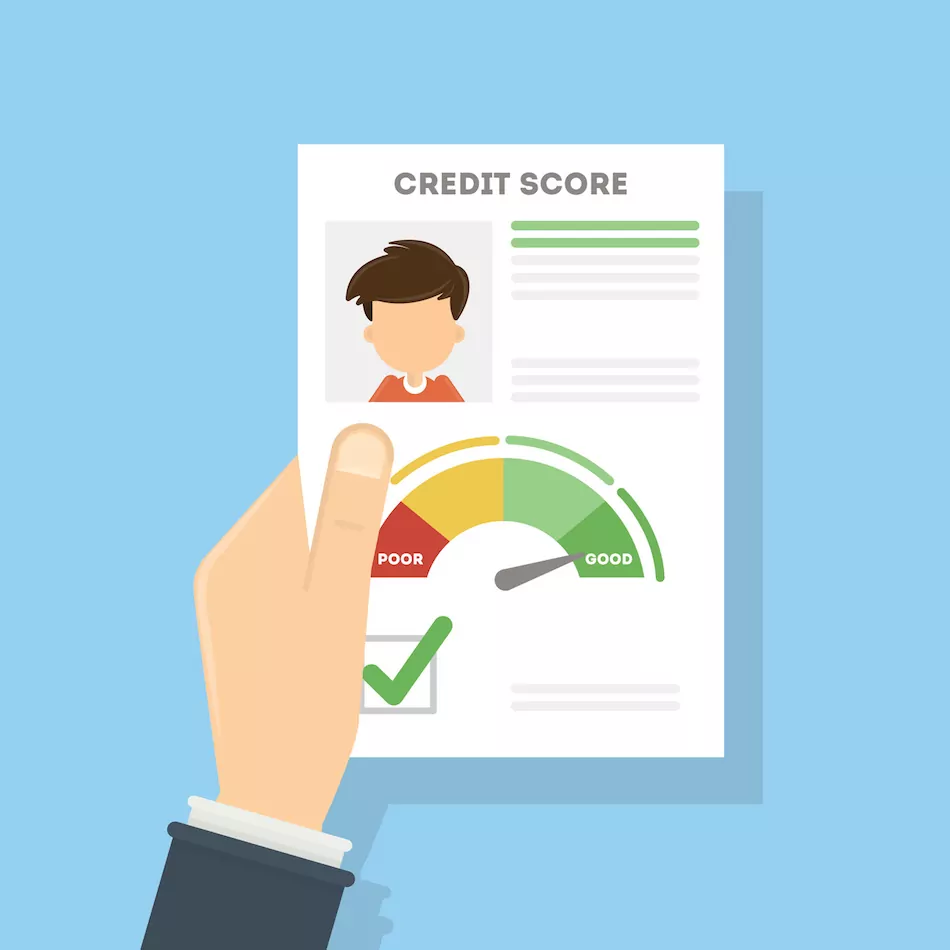

In [54]:
# load the data
df_credit=pd.read_csv("credit.csv")
df_credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


# Key Attribute of Data set:


**checking_balance:**status of exisiting checking balance(DM or D-mark--Deutsche mark it's official currency of west germany)
- 1 DEM- 41.8338 INR
- '< 0 DM', '1 - 200 DM', 'unknown', '> 200 DM'/salary at least one year

**months_loan_duration:**Loan Duration in month

**credit_history:**Credit history
- 'critical: other credits existing(not at this bank)', 
- 'poor: delay in paying off in the past',
- 'good: existing credits paid back duly till now',
- 'very good: all credits at this bank paid back duly'
- 'perfect: no credits taken/all credits paid back duly', 
 
**purpose:**Purpose of loan
- 'furniture/appliances', 'education', 'car', 'business','renovations', 'car0'

**amount:**Credit amount(that amount paid to the bank or company)

**savings_balance:**Saving account balance
- 'unknown', '< 100 DM', '500 - 1000 DM', '> 1000 DM','100 - 500 DM'

**employment_duration:**Present employment since
- '> 7 years', '1 - 4 years', '4 - 7 years', 'unemployed','< 1 year'

**percent_of_income:**Installment rate in percentage of disposable income(disposable income is the amount of money left to spend and save after income tax has been calculated)(it ensure that your total outgo on EMIs does not exceed certain percentage limit of your take salary/income)
- 1 = >= 35 %
- 2 = 25 <= … < 35%
- 3 = 20 <= … < 25%
- 4 = < 20%

**years_at_residence:**Year of residence
- 1= < 1 yr 
- 2 = 1 <= … < 4 yrs
- 3 = 4 <= … < 7 yrs 
- 4 = >= 7 yrs

**age:** Age in years

**other_credit:**Other installment plans
- 'none', 'bank', 'store'

**housing:**House status
- 'own', 'other', 'rent'

**existing_loans_count:**Number of existing loan installment
- 1 = 1
- 2 = 2-3 
- 3 = 4-5 
- 4 = >= 6

**job:**job status
- 'skilled', 'unskilled', 'management', 'unemployed'

**dependents:**Number of people being liable to provide maintenance for(the maintenance law in india lays down the duty of a man to provide maintenance to his parents to his parents,wife, and children when they unable to maintenance themselves)
- Number of persons who financially depend on the debtor
- 1 = 3 or more 
- 2 = 0 to 2

**phone:**Phone or not
- yes,no

**default:**Cost matrix(Risk)-(No)Good Risk -(YES)Bad Risk

In [55]:
#checking the shape of dataset
df_credit.shape

(1000, 17)

**Interpretation:**This dataset contains 1000 row and 17 attributes.

In [56]:
# change columns name for better understanding
df_credit.rename(columns={'checking_balance':'Checking_Balance',
                 'months_loan_duration':'Loan_Duration_In_Month',
                 'credit_history':'Credit_History',
                 'purpose':'Loan_Purpose',
                 'amount':'Credit_Amount',
                 'savings_balance':'Saving_Account_Balance',
                 'employment_duration':'Present_Employment_Since',
                 'percent_of_income':'Installment_Rent_In_Percent_Of_Income',
                 'years_at_residence':'Present_Residual_Since',
                 'age':'Age',
                 'other_credit':'Other_Installment_Plans',
                 'housing':'Housing_Status',
                 'existing_loans_count':'Number_Of_Existing_Loan_Installment',
                 'job':'Job',
                 'dependents':'Number_Of_Person_Financially_Depend_to_debtor',
                 'phone':'Phone_Have_Or_Not',
                 'default':'Credit_Risk'},inplace=True)
df_credit.head()

,Checking_Balance,Loan_Duration_In_Month,Credit_History,Loan_Purpose,Credit_Amount,Saving_Account_Balance,Present_Employment_Since,Installment_Rent_In_Percent_Of_Income,Present_Residual_Since,Age,Other_Installment_Plans,Housing_Status,Number_Of_Existing_Loan_Installment,Job,Number_Of_Person_Financially_Depend_to_debtor,Phone_Have_Or_Not,Credit_Risk
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [57]:
# change value of data
df_credit.replace({"Loan_Purpose":{"car":"car(new)","car0":"car(old)"},
                  "Installment_Rent_In_Percent_Of_Income":{1:'>= 35%',2:'25% - 35%',3:'25% - 20%',4:'<= 20%'},
                  "Present_Residual_Since":{1:" < 1 yrs",2:" 1 - 4 yrs",3:"4 - 7 yrs",4:" > 7 yrs"},
                  "Number_Of_Existing_Loan_Installment":{1:"1",2:"2 - 3",3:"4 - 5",4:">=6"},
                   "Number_Of_Person_Financially_Depend_to_debtor":{1:" >= 3 people",2:"0 - 2 people"},
                   "Credit_Risk":{"no":"Good Risk","yes":'Bad Risk'}
                  },inplace=True)
df_credit.head()

,Checking_Balance,Loan_Duration_In_Month,Credit_History,Loan_Purpose,Credit_Amount,Saving_Account_Balance,Present_Employment_Since,Installment_Rent_In_Percent_Of_Income,Present_Residual_Since,Age,Other_Installment_Plans,Housing_Status,Number_Of_Existing_Loan_Installment,Job,Number_Of_Person_Financially_Depend_to_debtor,Phone_Have_Or_Not,Credit_Risk
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,<= 20%,> 7 yrs,67,none,own,2 - 3,skilled,>= 3 people,yes,Good Risk
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,25% - 35%,1 - 4 yrs,22,none,own,1,skilled,>= 3 people,no,Bad Risk
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,25% - 35%,4 - 7 yrs,49,none,own,1,unskilled,0 - 2 people,no,Good Risk
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,25% - 35%,> 7 yrs,45,none,other,1,skilled,0 - 2 people,no,Good Risk
4,< 0 DM,24,poor,car(new),4870,< 100 DM,1 - 4 years,25% - 20%,> 7 yrs,53,none,other,2 - 3,skilled,0 - 2 people,no,Bad Risk


In [58]:
# getting more information using info command
df_credit.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Checking_Balance                               1000 non-null   object
 1   Loan_Duration_In_Month                         1000 non-null   int64 
 2   Credit_History                                 1000 non-null   object
 3   Loan_Purpose                                   1000 non-null   object
 4   Credit_Amount                                  1000 non-null   int64 
 5   Saving_Account_Balance                         1000 non-null   object
 6   Present_Employment_Since                       1000 non-null   object
 7   Installment_Rent_In_Percent_Of_Income          1000 non-null   object
 8   Present_Residual_Since                         1000 non-null   object
 9   Age                                            1000 non-null   i

**Interpretation:**Dataset not contain null value.

In [59]:
# getting statistical information about data
df_credit.describe()

,Loan_Duration_In_Month,Credit_Amount,Age
count,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,35.546000
std,12.058814,2822.736876,11.375469
min,4.000000,250.000000,19.000000
25%,12.000000,1365.500000,27.000000
50%,18.000000,2319.500000,33.000000
75%,24.000000,3972.250000,42.000000
max,72.000000,18424.000000,75.000000


**Interpretation:** **Statistics Summary of data and after observing mean and median we see that data not much contain outliers and this data is credit data so we can not delete outliers.**

# EDA (Exploratory Data Analysis)

**Univariant Analysis**

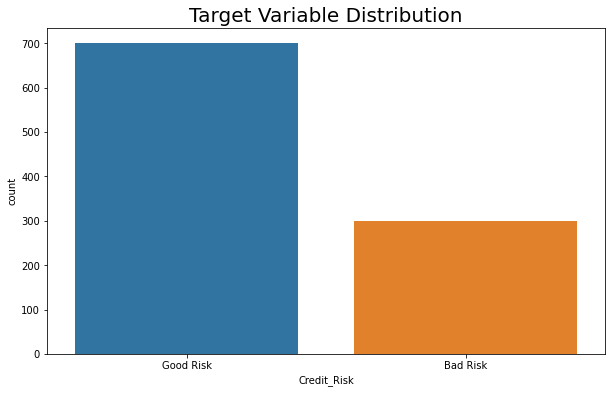

In [60]:
# check the diatribution of target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=df_credit, x="Credit_Risk")
plt.title("Target Variable Distribution", fontsize=20)
plt.show()


**interpretation:**
- There are 700 instances where an applicant was classified as good
- There are 300 instances where an applicant was classified as bad

<AxesSubplot:xlabel='Credit_Amount', ylabel='Count'>

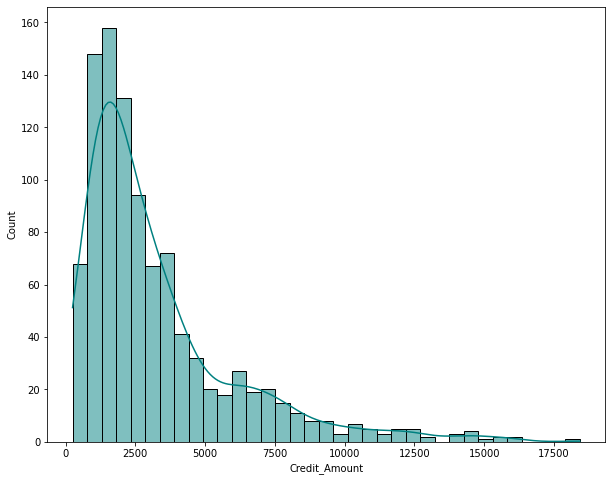

In [61]:
# plot the credit_amount  column
plt.figure(figsize=(10,8))
sns.histplot(x='Credit_Amount',color='teal',kde=True,data=df_credit)

**Interpretation:**Installment Credit_Amount mostly between 1000 to 3000.

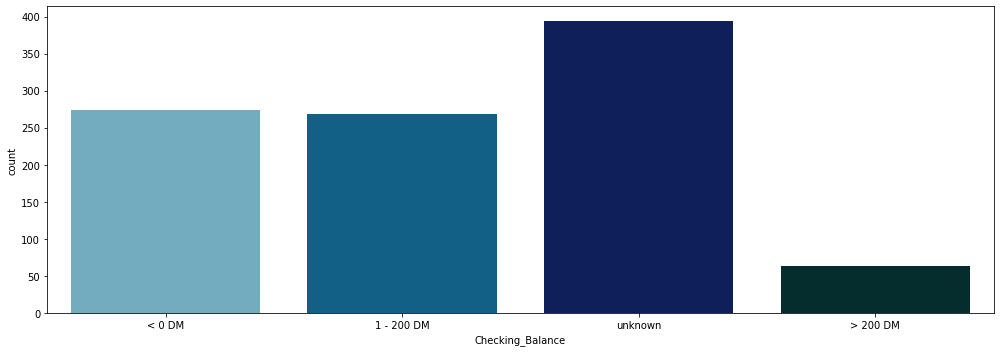

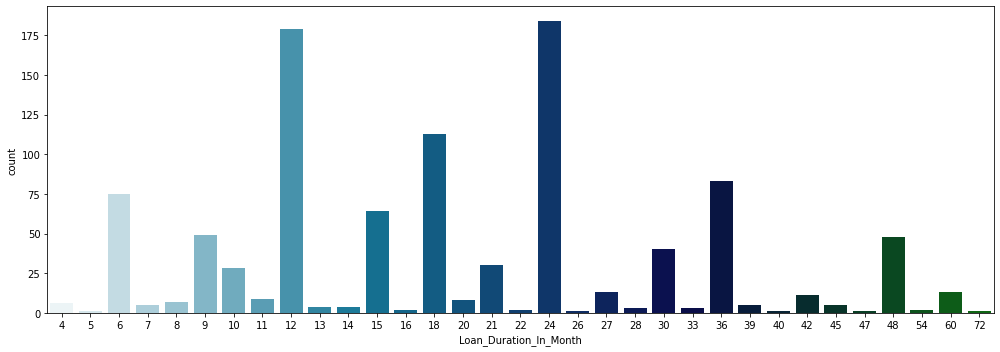

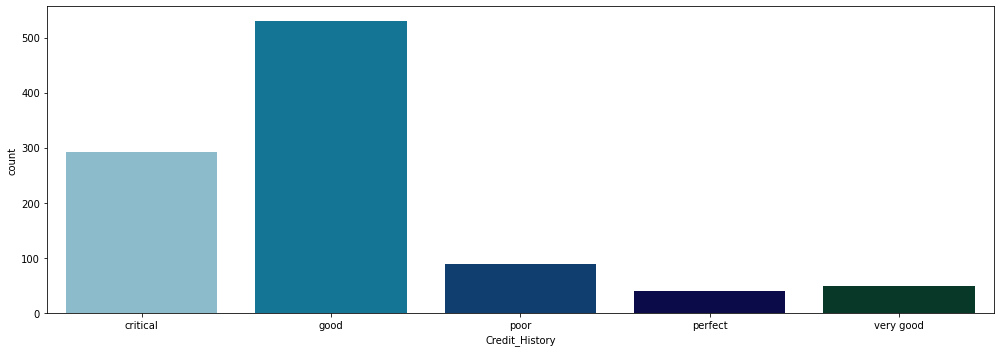

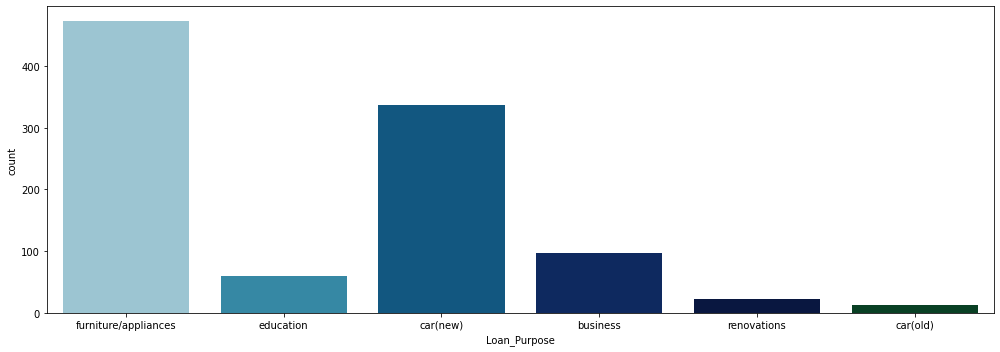

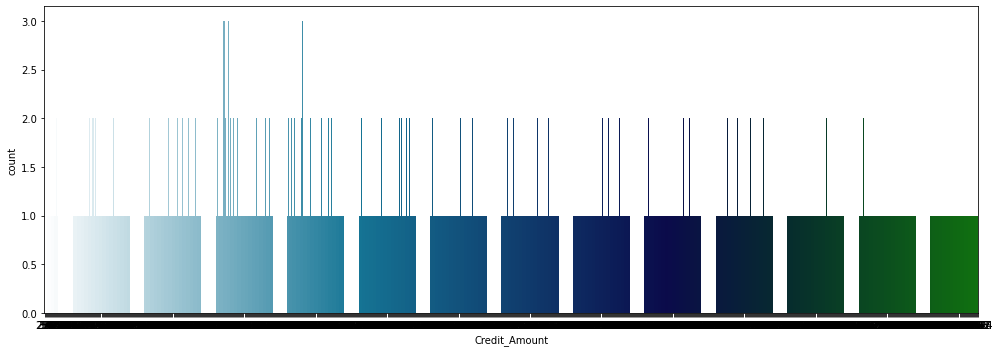

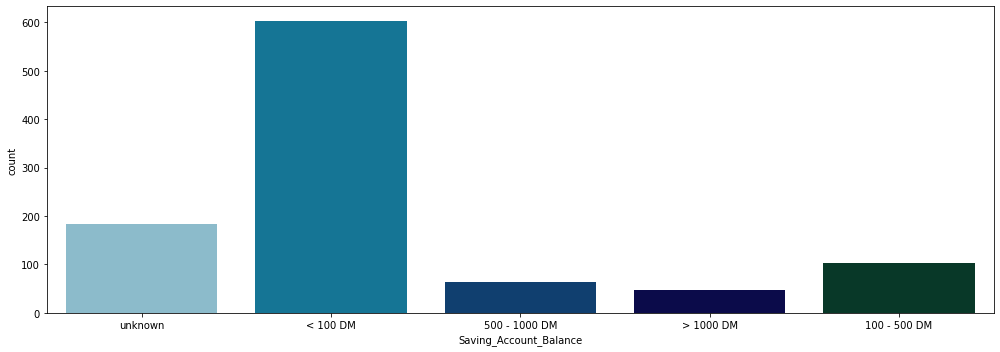

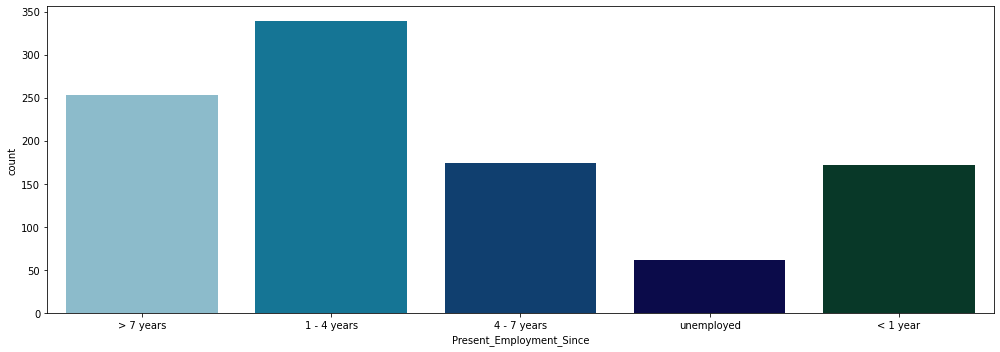

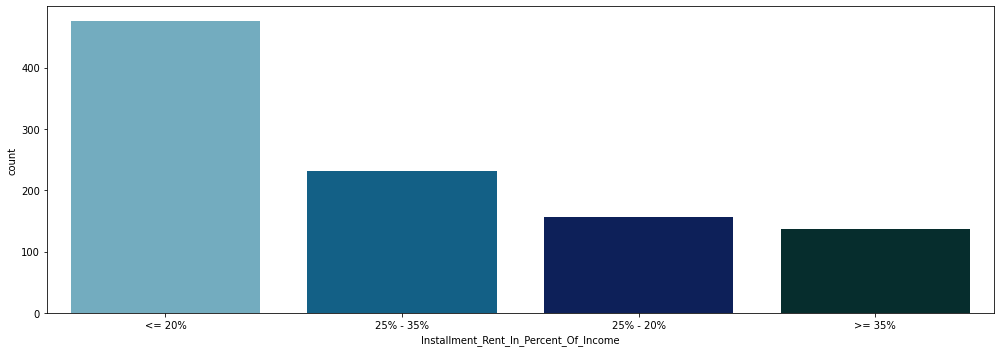

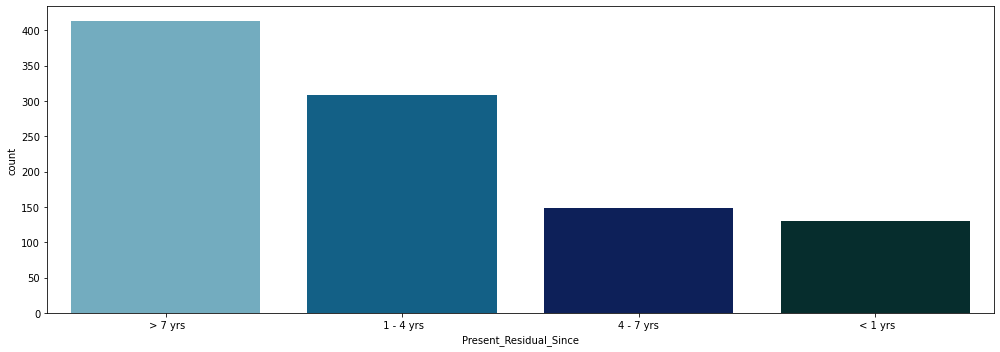

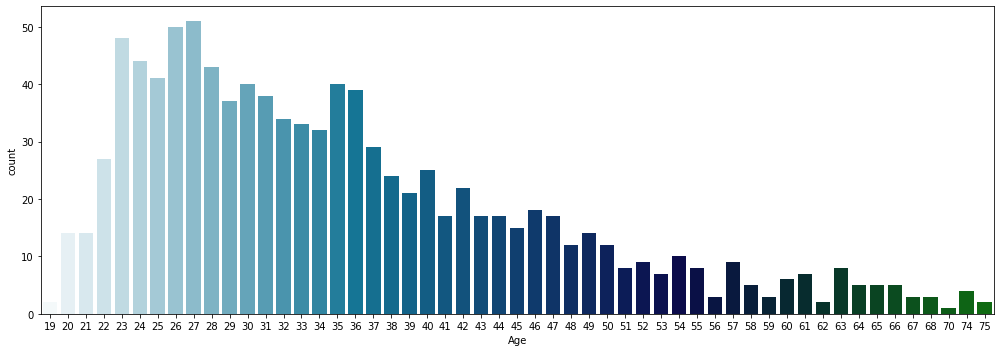

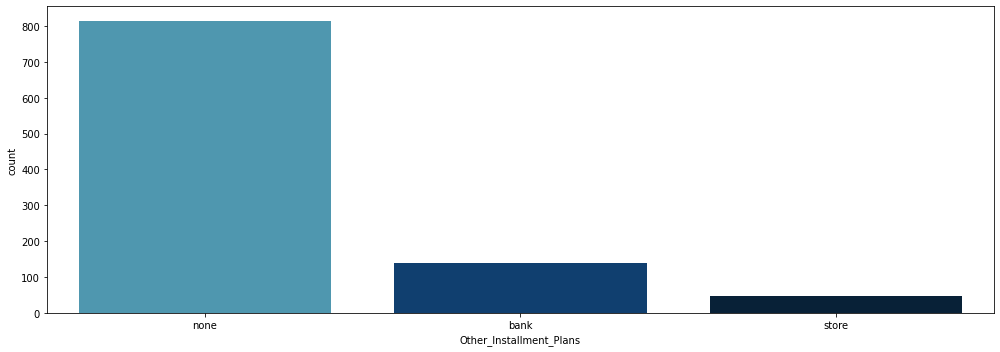

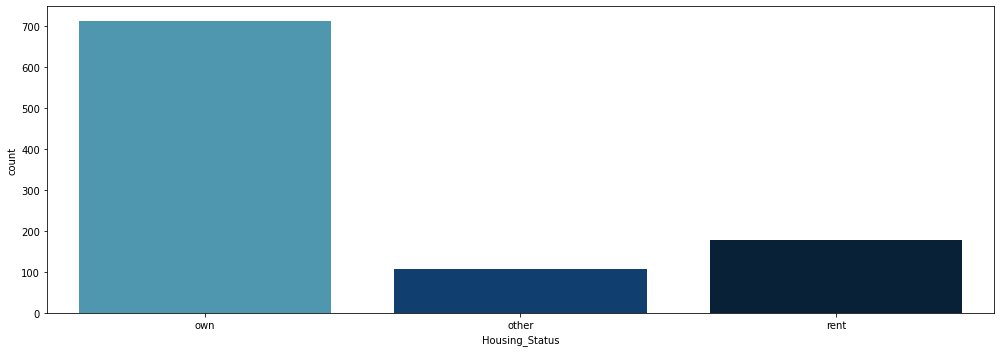

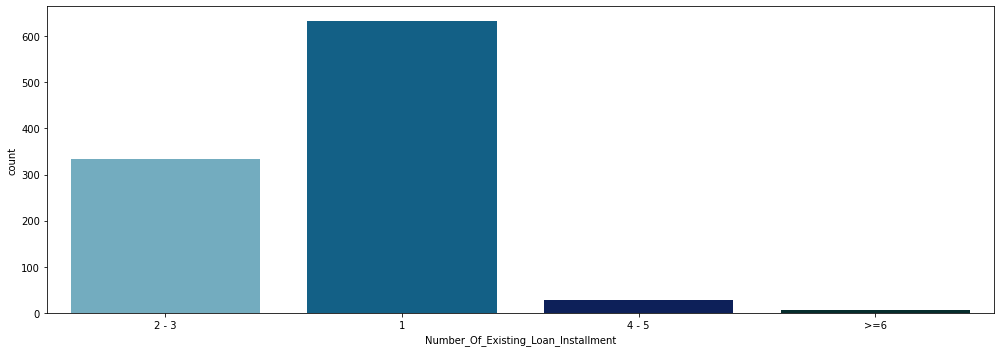

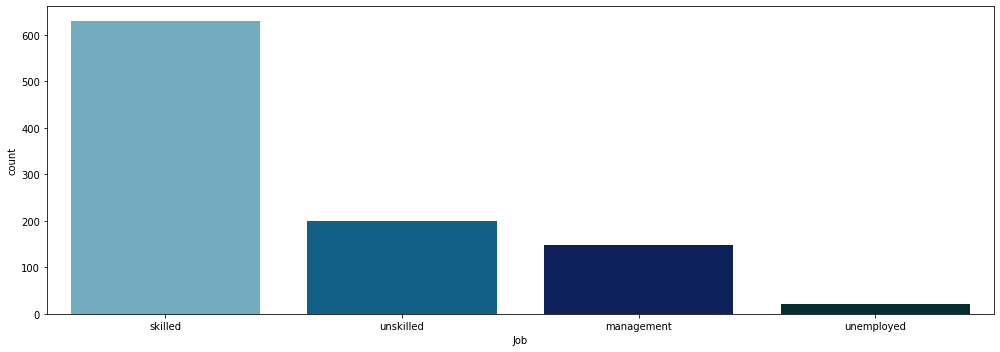

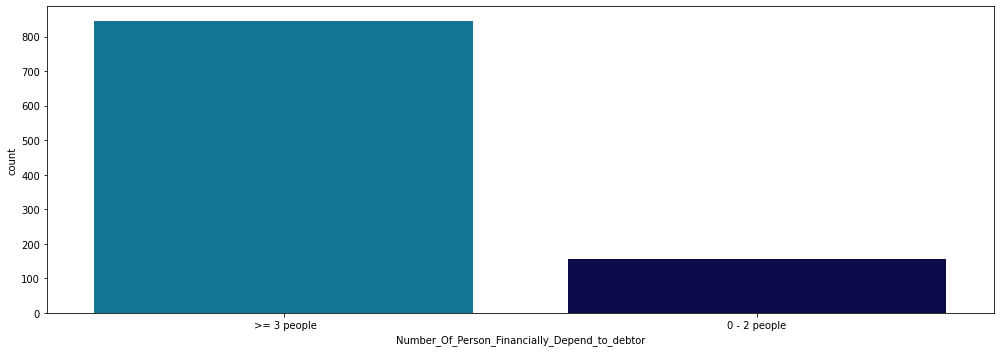

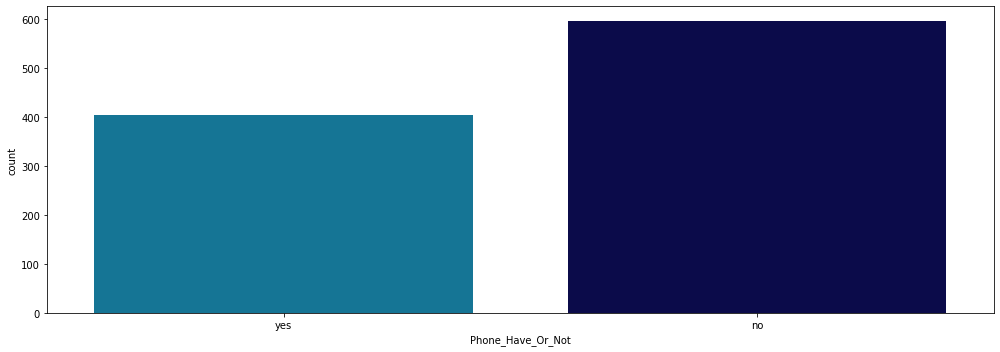

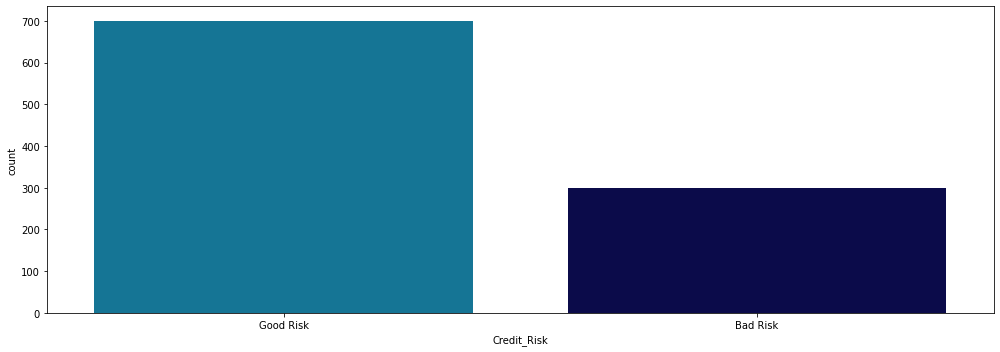

In [62]:
# plot  all the column 
for i in df_credit.columns:
    plt.figure(figsize=(14,5))
    sns.countplot(df_credit[i],palette='ocean_r')
    plt.tight_layout()

**Interpretation:**
- In checkig_balance column  we see that unknown count is more and >200 DM account balance customer less
- In loan duretion column we see that 12 and 24 month loan duration that loan customer take more.
- In credit histoy column we see that good credit history is more i.e. existing credit paid back duty till now is more compare to other so, this is good for bank.
- In Loan_purpose column Furniture/Appliances loan Purpose is more.
- In Saving_account_Balance column Saving account balance normal range is <100 DM
- In Pesent_Employement_since column 1-4 year employment people take loan more that means may be beginer take loan for car or home
- In installment_rent_in_present_of_income column Less than 20% installment rate take from the disposable income customer more.
- In present_residual_since column More than 7 year residual customer more.
- In AGE column 23 to 35 age group customer take more loan
- In other installment plans columns tells that Mostly customer take 1 loan at that time, few customer take more than 1 loan.
- In housing status column 70% customer have their own house.
- In Number_Of_Existing_Loan_Installment column says that 1 number of existing installment is more.
- In job column Skilled status job customer take more loan may be that have get monthly income regulerly so that capable pay to loan installment easily.
- In Number_Of_Person_Financially_Depend_to_debtor column 3 or more person financially depend to debtor count more.May be they pay installment late.
- In Phone_Have_Or_Not column 60% customer have not phone because this 1790s data so may be people have not carry phone that time.
- In credit risk column Good Risk is 70% and bad risk is 30%

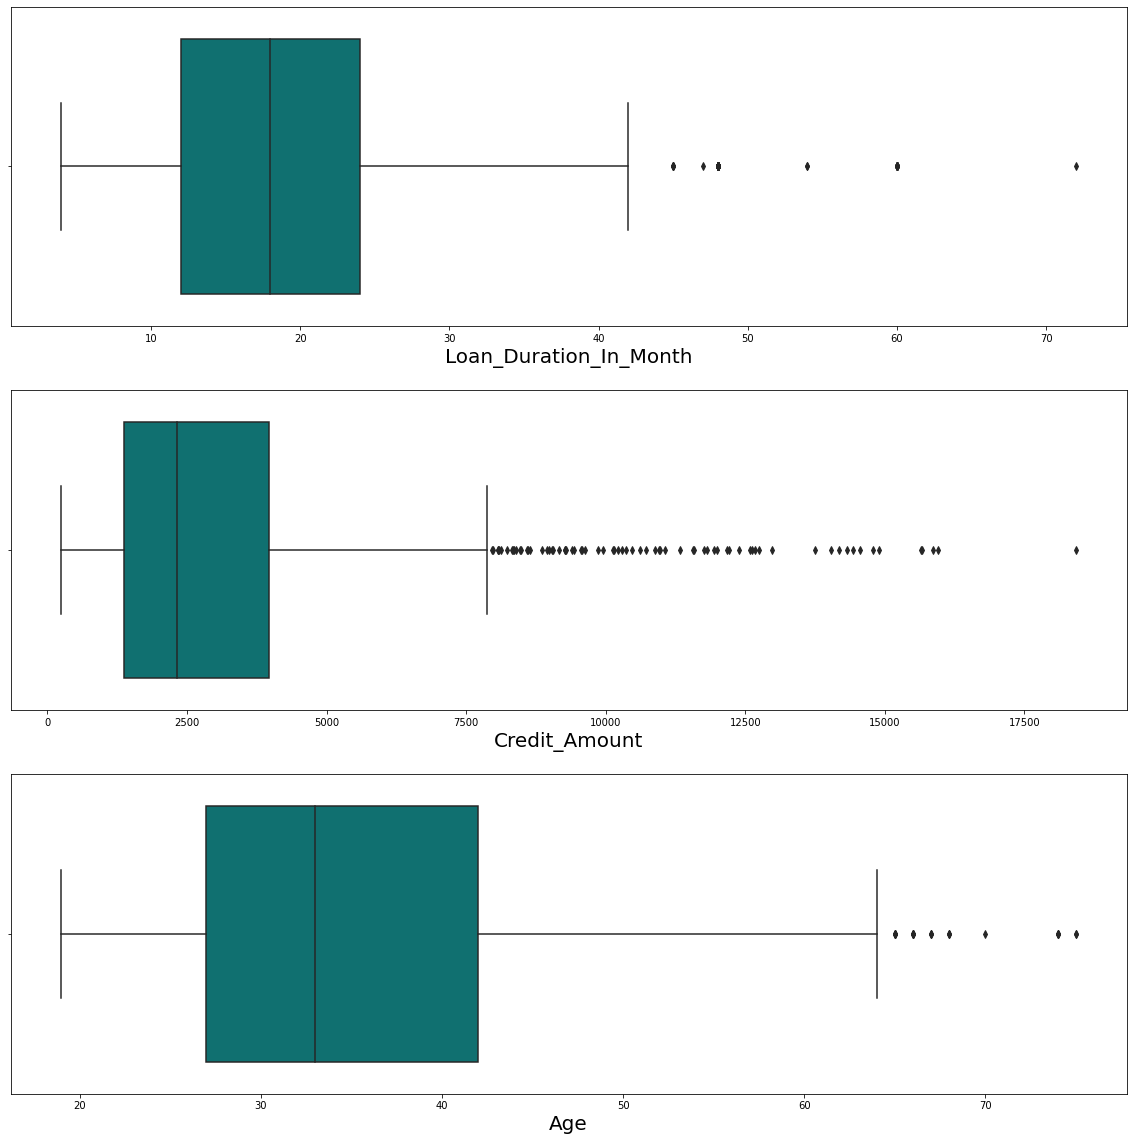

In [63]:
# plot the boxplot
df_num = df_credit.select_dtypes(include=[np.number])
fig, ax = plt.subplots(3,1,figsize=(20, 20))

for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot,color='teal') 
    z.set_xlabel(variable, fontsize = 20)                                     

**Bivariate Analysis**

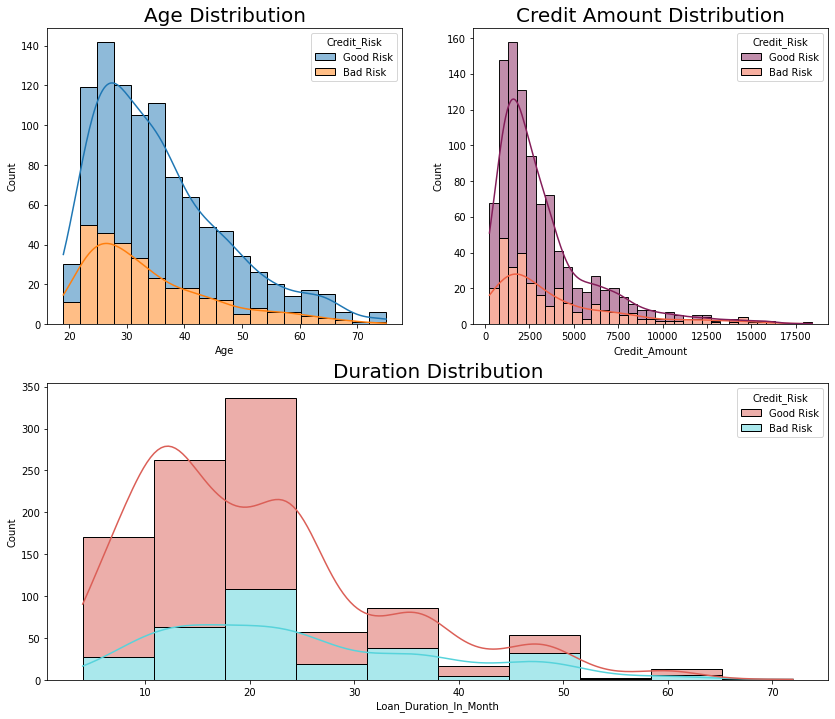

In [64]:
# plot the histogram plot using age,credit_risk,credit_amount,loan_duretion_in_month
plt.figure(figsize=(14, 12))

plt.subplot(221)
ax1 = sns.histplot(data=df_credit, x='Age', hue='Credit_Risk', multiple='stack', palette='tab10', kde=True)
ax1.set_title("Age Distribution", fontsize=20)

plt.subplot(222)
ax2 = sns.histplot(data=df_credit, x='Credit_Amount', hue='Credit_Risk', multiple='stack', palette='rocket', kde=True)
ax2.set_title("Credit Amount Distribution", fontsize=20)

plt.subplot(212)
ax3 = sns.histplot(data=df_credit, x='Loan_Duration_In_Month', hue='Credit_Risk', multiple='stack', palette='hls', kde=True, bins=10)
ax3.set_title("Duration Distribution", fontsize=20)

plt.show()

**interpretation:**
- All graphs have a positive skew indicating that the mean is greater than the median
- Applicants between the ages of 20 to 30 are more likely to apply for a loan
- Applicants are less likely to apply for a high credit loan
- More loans have been paid off around 20 months after being issued
- The bank is more likely to receive applicants between the ages of 20 and 30 and request loans between 250 and 2500 DM

Text(0.5, 1.0, 'Housing Distribution')

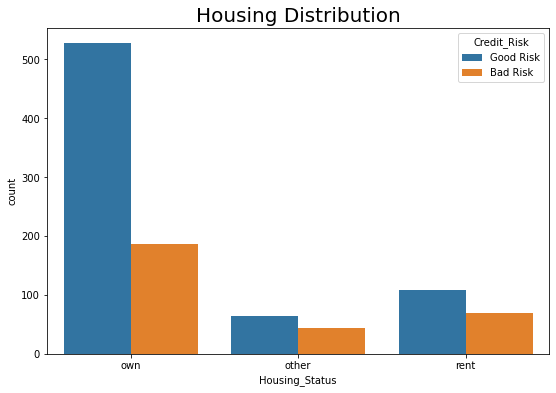

In [69]:
#plot the countplot using housing_status and credit_risk
plt.figure(figsize=(9, 6))
sns.countplot(data=df_credit, x='Housing_Status', hue='Credit_Risk')
plt.title("Housing Distribution", fontsize=20)



**Interpretation:**
- Most applicants own a house
- Over half of the applicants who own a house classified as good


In [66]:
# Bivariate Analysis
def visualize_distribution(attr):
    good_risk_df = df_credit[df_credit["Credit_Risk"]=="Good Risk"]
    bad_risk_df = df_credit[df_credit["Credit_Risk"]=="Bad Risk"]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    attr_good_risk_df = good_risk_df[[attr, 'Credit_Risk']].groupby(attr).count()
    attr_bad_risk_df = bad_risk_df[[attr, 'Credit_Risk']].groupby(attr).count()
    ax[0].barh( attr_good_risk_df['Credit_Risk'].index.tolist(), attr_good_risk_df['Credit_Risk'].tolist(), align='center', color="#5975A4")
    ax[1].barh( attr_bad_risk_df['Credit_Risk'].index.tolist(), attr_bad_risk_df['Credit_Risk'].tolist(), align='center', color="#B55D60")
    ax[0].set_title('Good Risk')
    ax[1].set_title('Bad Risk')
    ax[0].invert_xaxis()
    ax[1].yaxis.tick_right()
    num_para_change=["Present residence since","Number of existing credits at this bank","Installment rate in percentage of disposable income","Number of people being liable to provide maintenance for"]
    if attr in num_para_change:
        for i, v in enumerate(attr_good_risk_df['Credit_Risk'].tolist()):
            ax[0].text(v+15, i+1, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['Credit_Risk'].tolist()):
            ax[1].text(v+2, i+1, str(v), color='black')
    else:
        for i, v in enumerate(attr_good_risk_df['Credit_Risk'].tolist()):
            ax[0].text(v+25, i + .05, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['Credit_Risk'].tolist()):
            ax[1].text(v+1, i + .05, str(v), color='black')
    plt.suptitle(attr)
    plt.tight_layout()
    plt.show()


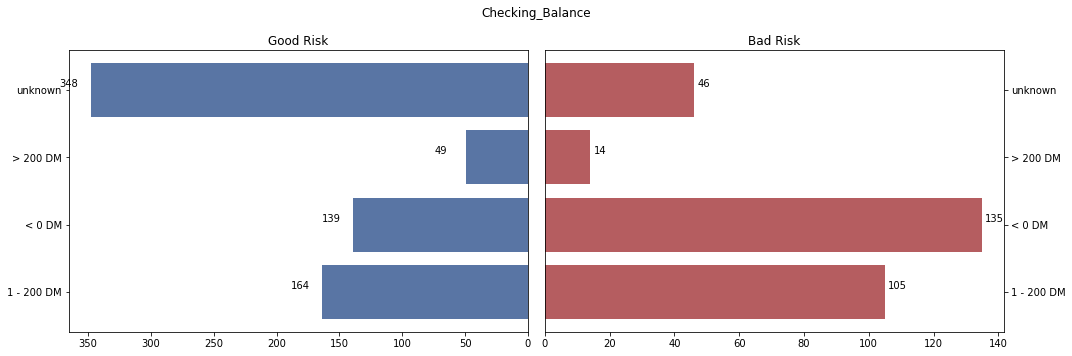

In [67]:
visualize_distribution("Checking_Balance")

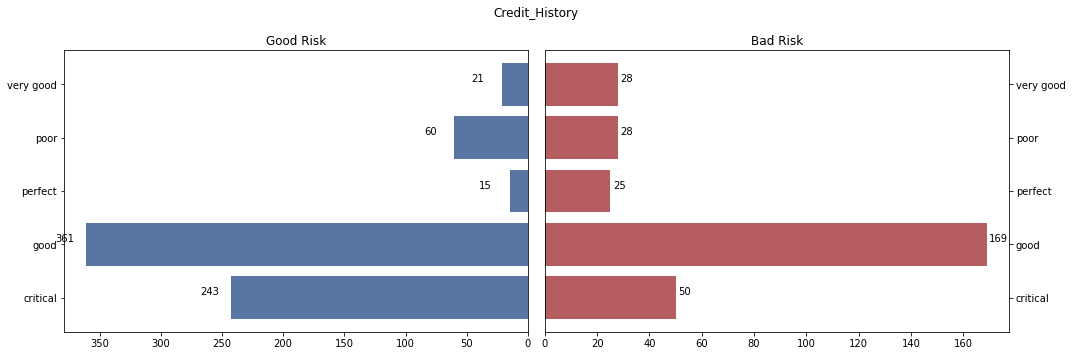

In [70]:
visualize_distribution("Credit_History")

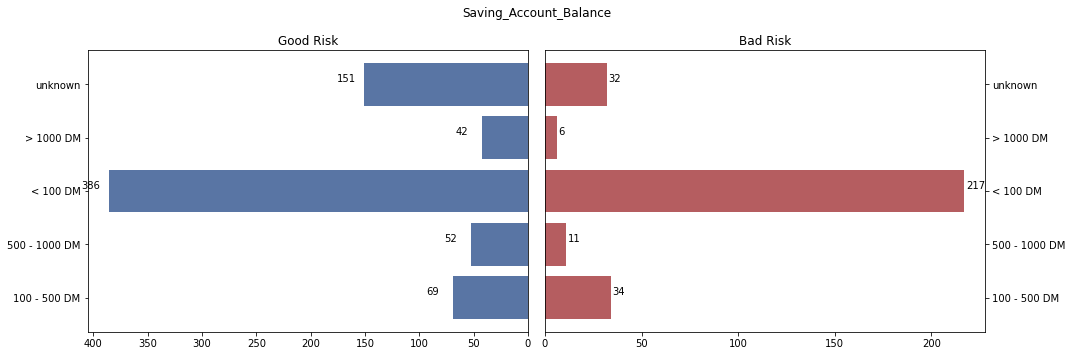

In [71]:
visualize_distribution("Saving_Account_Balance")

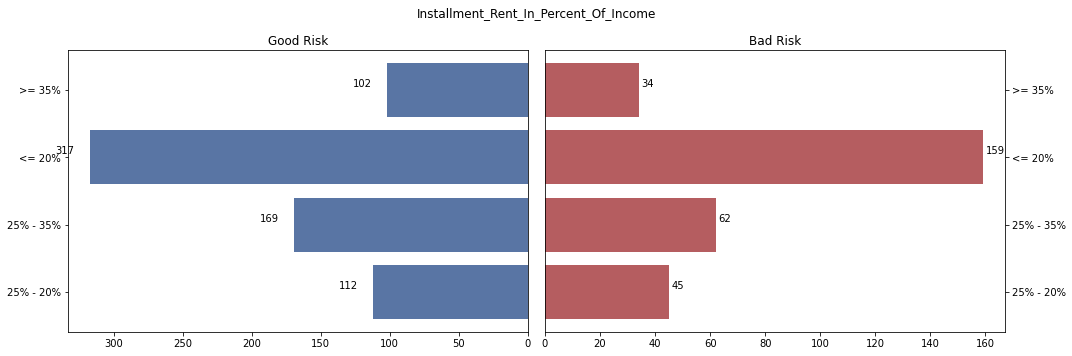

In [72]:
visualize_distribution("Installment_Rent_In_Percent_Of_Income")

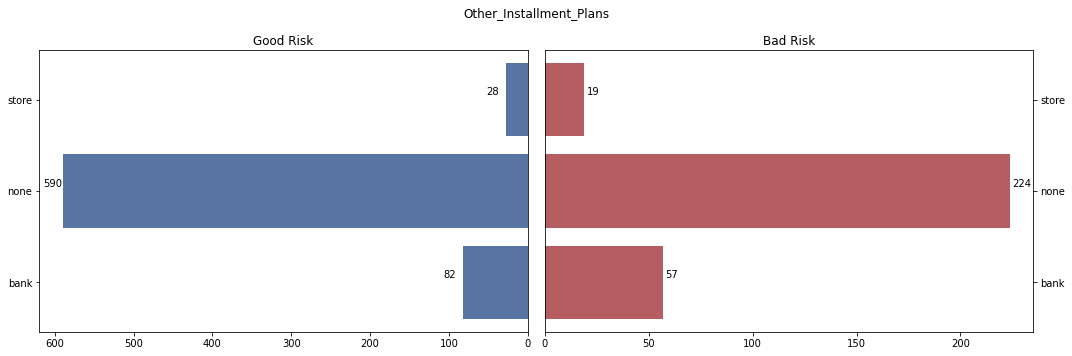

In [73]:
visualize_distribution("Other_Installment_Plans")

<AxesSubplot:xlabel='Loan_Duration_In_Month', ylabel='Credit_Amount'>

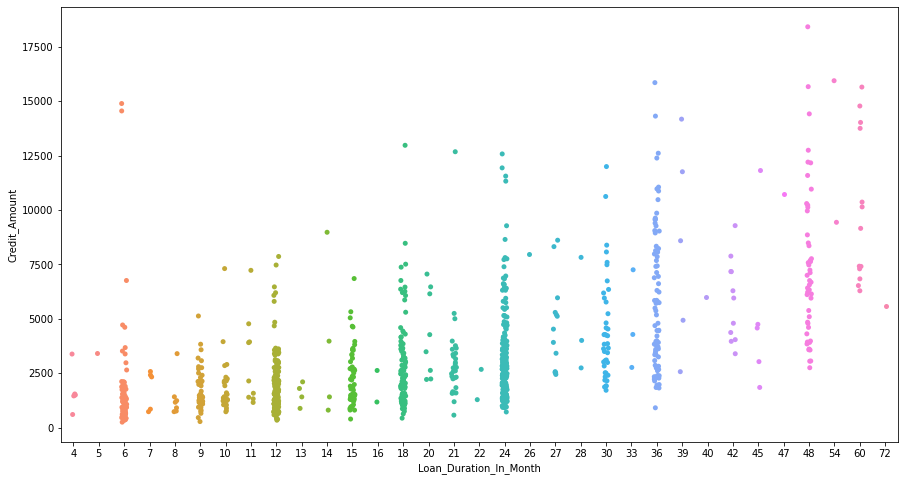

In [74]:
plt.figure(figsize=(15,8))
sns.stripplot(x='Loan_Duration_In_Month',y='Credit_Amount',data=df_credit)

**Interpretation:**We see that credit amount increase when loan duration increase

# 

**Multivariant Analysis**

<AxesSubplot:>

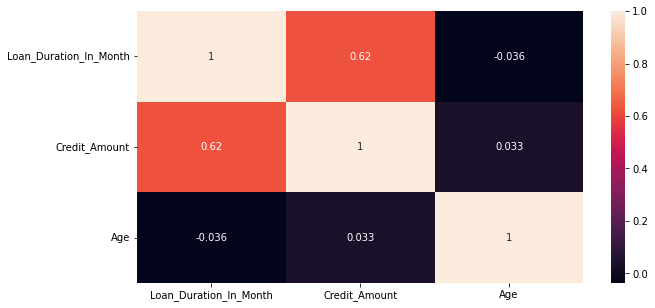

In [50]:
#correlation plot for multicollinearity relation
plt.figure(figsize=(10,5))
sns.heatmap(df_credit.corr(),annot=True)

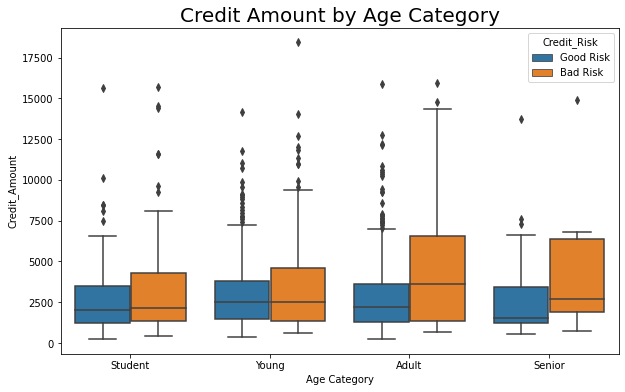

In [15]:
# plot the age,credit_amount and credit_risk using boxplot
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age Category"] = pd.cut(df_credit.Age, interval, labels=cats)

plt.figure(figsize=(10, 6))
plt.title("Credit Amount by Age Category", fontsize=20)
sns.boxplot(data=df_credit, x='Age Category', y='Credit_Amount', hue='Credit_Risk')
plt.show()


**Interpretation:**
- More than 50% of the applicants with credit amounts below 5,000 DM are classified as good
- Adults with loan credit greater than 5,000 DM are more likely to classify as bad
- Students and Young applicants are most likely to apply for loans with a credit amount of less than 5,000 DM

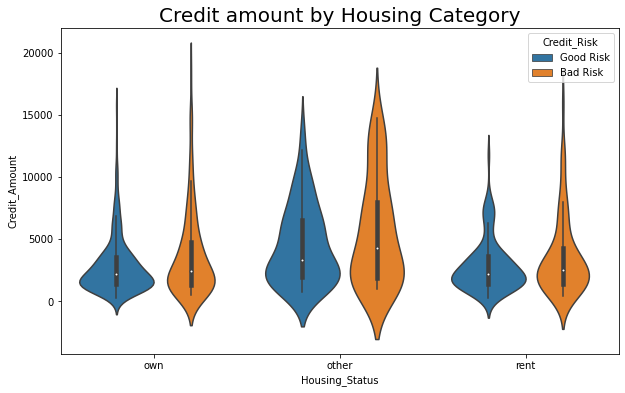

In [16]:
#plot the violine plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_credit, x='Housing_Status', y='Credit_Amount', hue='Credit_Risk')
plt.title("Credit amount by Housing Category", fontsize=20)
plt.show()


**Interpretation:**
- The density curves from the violin plot suggest that there is a higher frequency of applicants with credit amounts below 5,000 DM

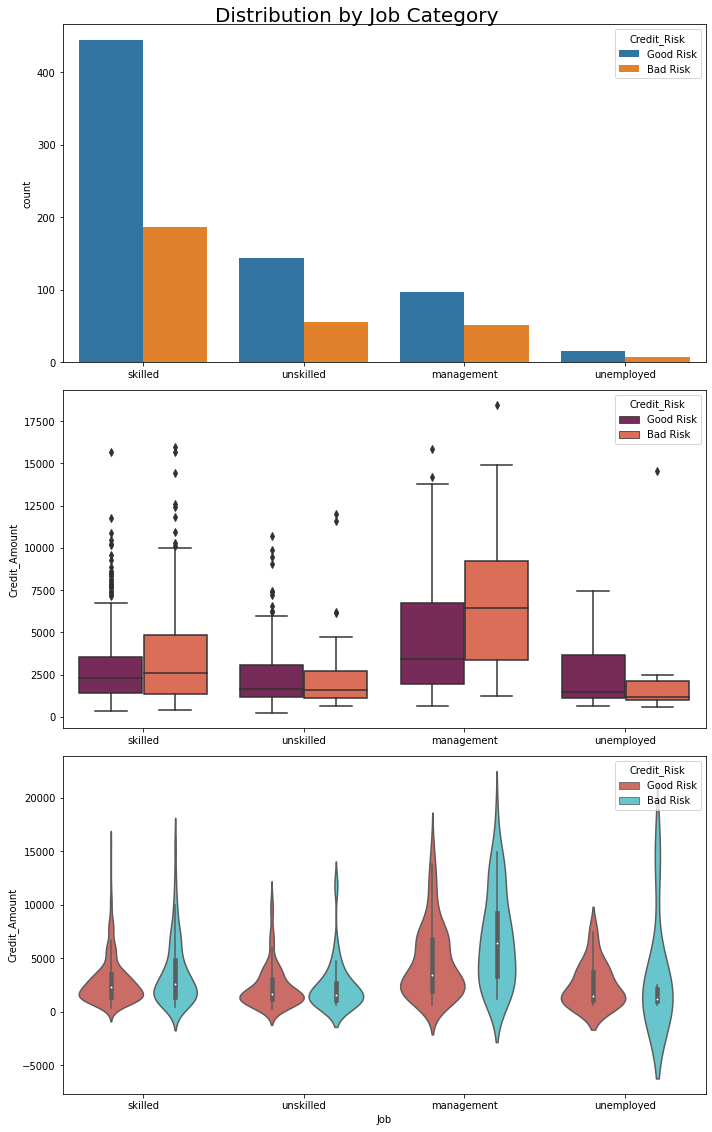

In [17]:
#plot the count,box and violine plot, and do some feature engineering
job_category = ['unskilled and non-resident', 'unskilled and resident', 'skilled', 'highly skilled'] # createing categorial values
df_credit['Job'] = df_credit['Job'].replace([0, 1, 2, 3], job_category) # replacing numerical with categorical values

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 16))
fig.suptitle("Distribution by Job Category", fontsize=20)
sns.countplot(data=df_credit, x='Job', hue='Credit_Risk', palette='tab10', ax=ax1)
ax1.set_xlabel("")
sns.boxplot(data=df_credit, x='Job', y='Credit_Amount', palette='rocket', hue='Credit_Risk', ax=ax2)
ax2.set_xlabel("")

sns.violinplot(data=df_credit, x='Job', y='Credit_Amount', palette='hls', hue='Credit_Risk', ax=ax3)
fig.tight_layout()
plt.show()


**Interpretation:**
- There are 2x more applicants with skilled jobs that are classified as good
- More than 50% of applicants are under the skilled and unskilled and resident job categories
- Applicants that are highly skilled are more likely to take out larger loans

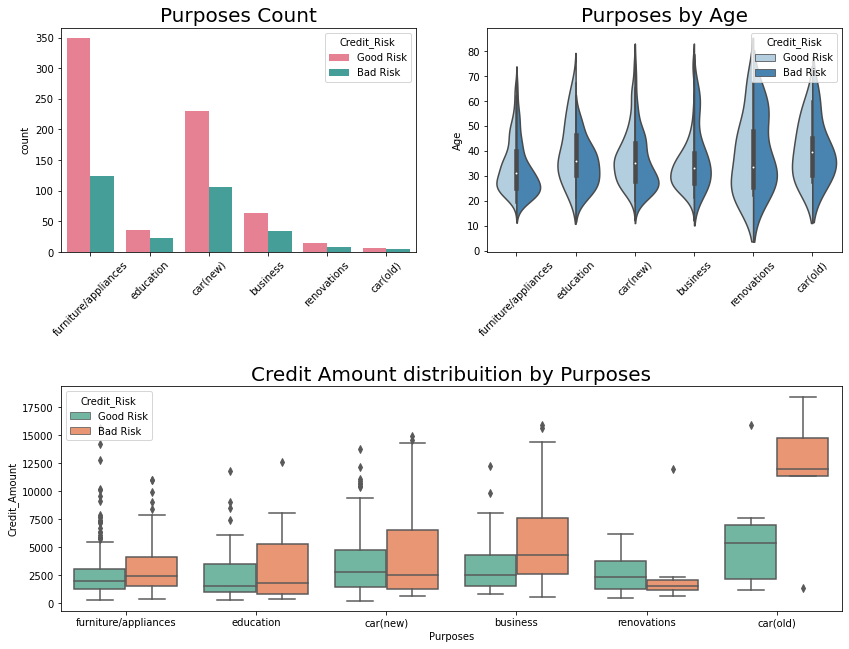

In [18]:
#plot the count,box and violine plot

plt.figure(figsize = (14,12))

plt.subplot(221)
ax1 = sns.countplot(data=df_credit, x="Loan_Purpose", palette="husl", hue = "Credit_Risk")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_xlabel("")
ax1.set_title("Purposes Count", fontsize=20)

plt.subplot(222)
ax2 = sns.violinplot(data=df_credit, x="Loan_Purpose", y="Age", palette="Blues", hue = "Credit_Risk",split=True)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
ax2.set_xlabel("")
ax2.set_title("Purposes by Age", fontsize=20)

plt.subplot(212)
ax3 = sns.boxplot(data=df_credit, x="Loan_Purpose", y="Credit_Amount", palette="Set2", hue = "Credit_Risk")
ax3.set_xlabel("Purposes")
ax3.set_title("Credit Amount distribuition by Purposes", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()


**Interpretation:**
- A large portion of applicants requested loans for buying cars, radios/tv’s
- More than half of the applicants applied for loans less than 5,000 DM
- Applicants with high credit loans are more likely to classify as bad

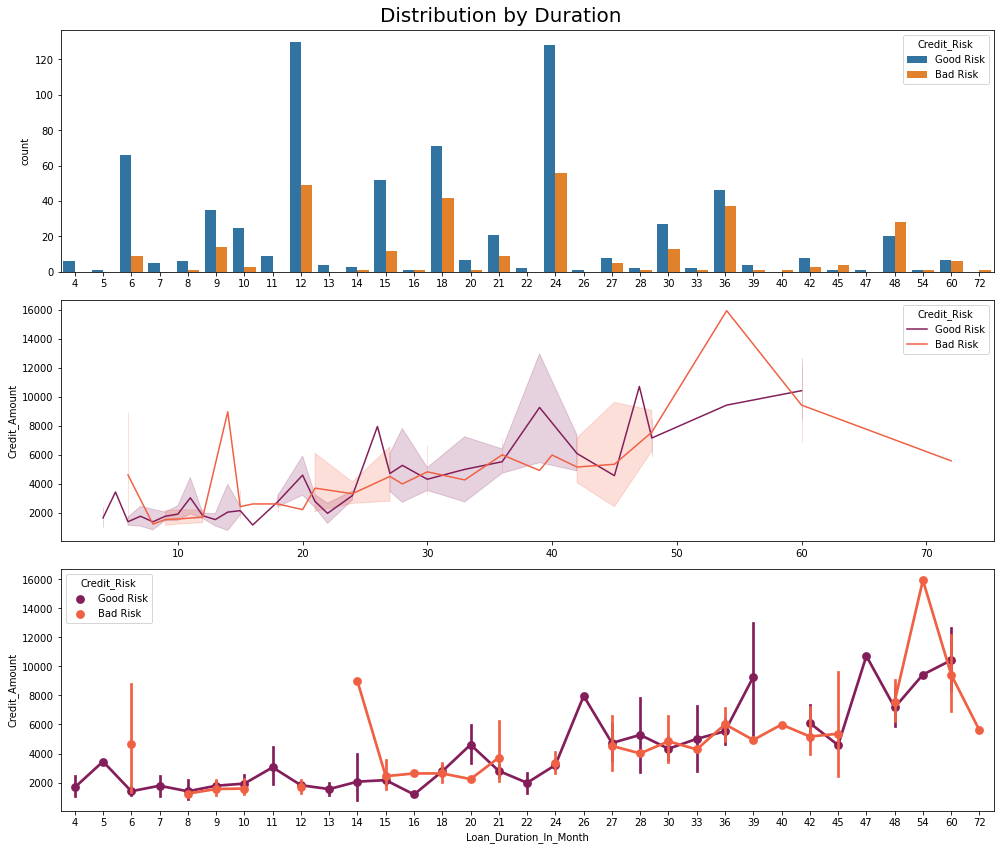

In [19]:
#plot the count,line,point plot

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12))
fig.suptitle("Distribution by Duration", fontsize=20)
sns.countplot(data=df_credit, x='Loan_Duration_In_Month', hue='Credit_Risk', palette='tab10', ax=ax1)
ax1.set_xlabel("")

sns.lineplot(data=df_credit, x='Loan_Duration_In_Month', y='Credit_Amount', hue='Credit_Risk', palette='rocket', ax=ax2)
ax2.set_xlabel("")

sns.pointplot(data=df_credit, x='Loan_Duration_In_Month', y='Credit_Amount', hue='Credit_Risk', palette='rocket', ax=ax3)
fig.tight_layout()
plt.show()


**Interpretation:**
- Most of the loans issued had a duration of 12 and 24 months
- Most applicants that repaid their loans within 24 months are classified as good
- Most applicants with a loan duration that exceeds 24 months are classified as bad


# Filter numerical and categorical variables

In [20]:
# target variable
df_target=df_credit.Credit_Risk

In [21]:
#create new data frame
df_credit=pd.DataFrame(df_credit)

In [22]:
# drop Credit_rick column 
df_credit=df_credit.drop('Credit_Risk',axis=1)

In [23]:
# make a new data frame for categorical variable
df_Cat=df_credit.select_dtypes(include=['object'])
df_Cat.head()

,Checking_Balance,Credit_History,Loan_Purpose,Saving_Account_Balance,Present_Employment_Since,Installment_Rent_In_Percent_Of_Income,Present_Residual_Since,Other_Installment_Plans,Housing_Status,Number_Of_Existing_Loan_Installment,Job,Number_Of_Person_Financially_Depend_to_debtor,Phone_Have_Or_Not
0,< 0 DM,critical,furniture/appliances,unknown,> 7 years,<= 20%,> 7 yrs,none,own,2 - 3,skilled,>= 3 people,yes
1,1 - 200 DM,good,furniture/appliances,< 100 DM,1 - 4 years,25% - 35%,1 - 4 yrs,none,own,1,skilled,>= 3 people,no
2,unknown,critical,education,< 100 DM,4 - 7 years,25% - 35%,4 - 7 yrs,none,own,1,unskilled,0 - 2 people,no
3,< 0 DM,good,furniture/appliances,< 100 DM,4 - 7 years,25% - 35%,> 7 yrs,none,other,1,skilled,0 - 2 people,no
4,< 0 DM,poor,car(new),< 100 DM,1 - 4 years,25% - 20%,> 7 yrs,none,other,2 - 3,skilled,0 - 2 people,no


In [24]:
# make a new data frame for numerical variable
df_num=df_credit.select_dtypes(include=['number']).reset_index()
df_num.head()

,index,Loan_Duration_In_Month,Credit_Amount,Age
0,0,6,1169,67
1,1,48,5951,22
2,2,12,2096,49
3,3,42,7882,45
4,4,24,4870,53


# Encode the Data

In [25]:
# Encode the data using dummy encoder
encode_data=pd.get_dummies(data = df_Cat, drop_first=True).reset_index()
encode_data.shape

(1000, 39)

In [26]:
# join the numerical and encoded data and save it in to one dataframe
df_concat=pd.concat([df_num,encode_data],axis=1)
df_concat.reset_index()
df_concat.shape

(1000, 43)

In [27]:
# check the null value
df_concat.isnull().sum()

index                                                         0
Loan_Duration_In_Month                                        0
Credit_Amount                                                 0
Age                                                           0
index                                                         0
Checking_Balance_< 0 DM                                       0
Checking_Balance_> 200 DM                                     0
Checking_Balance_unknown                                      0
Credit_History_good                                           0
Credit_History_perfect                                        0
Credit_History_poor                                           0
Credit_History_very good                                      0
Loan_Purpose_car(new)                                         0
Loan_Purpose_car(old)                                         0
Loan_Purpose_education                                        0
Loan_Purpose_furniture/appliances       

# Train Test Split

In [28]:
#split data

# set of independent variables
# create a copy of 'df_compensation_dummy' and store in the dataframe 'X_full'
X_full = df_concat.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full,y_full, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

X_train_full (700, 44)
y_train_full (700,)
X_test_full (300, 44)
y_test_full (300,)


# Make a Base model

In [29]:
# import DecisionTreeClassifier from sklearn libraries
from sklearn.tree import DecisionTreeClassifier

In [30]:
# make base model
DTC=DecisionTreeClassifier(criterion='entropy',random_state=10)
Base_Model=DTC.fit(X_train_full,y_train_full)

In [31]:
# print the predicted test data
Pridect_test=Base_Model.predict(X_test_full)
Pridect_test

array(['Bad Risk', 'Bad Risk', 'Good Risk', 'Good Risk', 'Bad Risk',
       'Good Risk', 'Good Risk', 'Bad Risk', 'Good Risk', 'Good Risk',
       'Good Risk', 'Good Risk', 'Good Risk', 'Good Risk', 'Good Risk',
       'Good Risk', 'Good Risk', 'Good Risk', 'Good Risk', 'Bad Risk',
       'Good Risk', 'Good Risk', 'Good Risk', 'Good Risk', 'Good Risk',
       'Good Risk', 'Bad Risk', 'Good Risk', 'Good Risk', 'Bad Risk',
       'Bad Risk', 'Good Risk', 'Bad Risk', 'Bad Risk', 'Good Risk',
       'Good Risk', 'Good Risk', 'Bad Risk', 'Good Risk', 'Good Risk',
       'Good Risk', 'Bad Risk', 'Good Risk', 'Bad Risk', 'Good Risk',
       'Good Risk', 'Good Risk', 'Good Risk', 'Good Risk', 'Good Risk',
       'Good Risk', 'Good Risk', 'Good Risk', 'Good Risk', 'Good Risk',
       'Good Risk', 'Bad Risk', 'Bad Risk', 'Good Risk', 'Good Risk',
       'Good Risk', 'Good Risk', 'Good Risk', 'Good Risk', 'Bad Risk',
       'Bad Risk', 'Good Risk', 'Good Risk', 'Bad Risk', 'Bad Risk',
       'Goo

In [32]:
# import confusion_matrix from sklearn
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_full,Pridect_test)

array([[ 38,  48],
       [ 47, 167]], dtype=int64)

In [33]:
# print the classificarion report
print(classification_report(y_test_full,Pridect_test))

              precision    recall  f1-score   support

    Bad Risk       0.45      0.44      0.44        86
   Good Risk       0.78      0.78      0.78       214

    accuracy                           0.68       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.68      0.68      0.68       300



In [34]:
# print the predicted train data
Pridect_train=Base_Model.predict(X_train_full)
Pridect_train

array(['Bad Risk', 'Good Risk', 'Bad Risk', 'Good Risk', 'Good Risk',
       'Good Risk', 'Bad Risk', 'Good Risk', 'Good Risk', 'Good Risk',
       'Good Risk', 'Good Risk', 'Good Risk', 'Good Risk', 'Good Risk',
       'Good Risk', 'Bad Risk', 'Good Risk', 'Good Risk', 'Good Risk',
       'Good Risk', 'Good Risk', 'Good Risk', 'Good Risk', 'Good Risk',
       'Good Risk', 'Bad Risk', 'Good Risk', 'Good Risk', 'Bad Risk',
       'Good Risk', 'Good Risk', 'Good Risk', 'Good Risk', 'Good Risk',
       'Good Risk', 'Good Risk', 'Bad Risk', 'Good Risk', 'Good Risk',
       'Good Risk', 'Bad Risk', 'Good Risk', 'Good Risk', 'Good Risk',
       'Good Risk', 'Good Risk', 'Good Risk', 'Good Risk', 'Good Risk',
       'Bad Risk', 'Good Risk', 'Good Risk', 'Bad Risk', 'Bad Risk',
       'Bad Risk', 'Good Risk', 'Good Risk', 'Good Risk', 'Good Risk',
       'Good Risk', 'Bad Risk', 'Good Risk', 'Bad Risk', 'Good Risk',
       'Good Risk', 'Bad Risk', 'Bad Risk', 'Good Risk', 'Bad Risk',
       'B

In [35]:
# import confusion_matrix from sklearn

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_full,Pridect_train)

array([[214,   0],
       [  0, 486]], dtype=int64)

In [36]:
# print the classificarion report

print(classification_report(y_train_full,Pridect_train))

              precision    recall  f1-score   support

    Bad Risk       1.00      1.00      1.00       214
   Good Risk       1.00      1.00      1.00       486

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



**here we see that classification decision tree model is overfitted because accurancy of traing is 100% but test is 69%**





**Now to overcome this problem we use grid search cv**

In [37]:
from sklearn.metrics import classification_report

In [38]:
def get_train_report(model):
    train_pred=model.predict(X_train_full)
    return(classification_report(y_train_full,train_pred))
#create a generalized function to calculate the metrics 
#value for test
def get_test_report(model):
    test_pred=model.predict(X_test_full)


In [39]:
tuned_parameter=[{'criterion':['entropy','gini'],
                 'max_depth':range(2,10),
                  'max_features':['sqrt','log2'],
                 'min_samples_split':range(2,10),
                 'min_samples_leaf':range(1,10),
                 'max_leaf_nodes':range(1,10)}]

In [40]:
decision=DecisionTreeClassifier(random_state=10)

In [41]:
# import Grid Serch cv and give the vale  of their atribute
from sklearn.model_selection import GridSearchCV
tree_grid=GridSearchCV(estimator=decision,param_grid=tuned_parameter,cv=5)

In [42]:
# make a model
tree_grid_model=tree_grid.fit(X_train_full,y_train_full)

In [43]:
# store the value of dicision tree classifier value  in dt3
dt3=DecisionTreeClassifier(criterion='entropy', max_depth= 5, max_features='sqrt', 
                           max_leaf_nodes= 8, min_samples_leaf= 3, min_samples_split= 2)

In [44]:
#fit the values
dt=dt3.fit(X_train_full,y_train_full)

In [45]:
#pridict train data and print it's shape
predict1_train=dt.predict(X_train_full)
predict1_train.shape

(700,)

In [46]:
#pridict test data and print it's shape
predict1_test=dt.predict(X_test_full)
predict1_test.shape

(300,)

In [47]:
# print classification_report
from sklearn.metrics import classification_report
print(classification_report(y_train_full,predict1_train))

              precision    recall  f1-score   support

    Bad Risk       0.56      0.54      0.55       214
   Good Risk       0.80      0.81      0.81       486

    accuracy                           0.73       700
   macro avg       0.68      0.68      0.68       700
weighted avg       0.73      0.73      0.73       700



In [48]:
# print classification_report

print(classification_report(y_test_full,predict1_test))

              precision    recall  f1-score   support

    Bad Risk       0.52      0.49      0.50        86
   Good Risk       0.80      0.82      0.81       214

    accuracy                           0.72       300
   macro avg       0.66      0.65      0.66       300
weighted avg       0.72      0.72      0.72       300



**accuracy of train data and test data is 0.71 (both are same)**

# Conclusions 

We investigated the data, checking for data unbalancing, visualizing the features, and understanding the relationship between different features. We then investigated predictive model.

By Data Visualization we reach on concusion like Loans with durations terms less than 24 months are more likely to be repaid.It’s safer to issue loans with a credit amount less than 5,000 DM and a duration term of fewer than 24 months.Applicants who own property show that they are financially independent and are better candidates for a loan.Applicants with skilled and highly skilled jobs are safer candidates to issue loans.Car loans are the most common loans with a high gain to-loss ratio issued by the bank (most profitable loan).It’s more profitable to issue loans that are less than 2,500 DM than higher credit loans that are less likely to be repaid.

By building a model the accuracy of model comes 71%

The problem doesn't end here. There are many other things to consider with this case study. The model shouldn't be the solve decision maker for approving a loan, but rather should be used as a tool that can help financial analysts make better-informed decisions regarding a loan applicant. For now, we can say that we’ve successfully built, trained, and tested a classifier to address the problem in this case study.